In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import locale

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px

from scipy.stats import ttest_rel
from scipy.stats import shapiro
from scipy.stats import fisher_exact

In [2]:
# Definir a formatação local para o Brasil
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Definir um alias para a função locale.format_string()
def valor(valor):
    return locale.format_string('%.2f', valor, grouping=True)

In [3]:
Carteira = pd.read_excel('./data/carteira.xlsx')
Carteira

Código          Ação      Peso                Setor               Subsetor
0  VALE3          VALE  0.317285         Mats Básicos              Mineração
1  PETR4     PETROBRAS  0.181011             Petróleo  Gás e Biocombustíveis
2  ITUB4  ITAUUNIBANCO  0.166725           Financeiro        Interms Financs
3  ELET3    ELETROBRAS  0.089125       Utilidade Públ         Energ Elétrica
4  ABEV3     AMBEV S/A  0.062038  Consumo Não-Cíclico                Bebidas
5  RENT3      LOCALIZA  0.054199             Diversos               Diversos
6  WEGE3           WEG  0.053712           Bens Indls          Máqs e Equips
7  RADL3  RAIADROGASIL  0.037431                Saúde        Comércio Distr.
8  VIVT3  TELEF BRASIL  0.022171         TI e Telecom        Telecomunicação
9  LREN3  LOJAS RENNER  0.016304      Consumo Cíclico               Comércio

In [4]:
# Ajustando os Códigos da ação para o padrão do yfinance
Carteira['Código'] = Carteira['Código']+'.SA'

start='2007-01-01'
end='2024-06-28'

#df_precos = yf.download(list(Carteira['Código']), start=start, end=end, rounding=True )['Adj Close']

# Salvando os dados em .xlsx
#df_precos.to_excel('./data/precos_historicos.xlsx')


# lendo arquivo xlsx
df_precos = pd.read_excel('./data/precos_historicos.xlsx', index_col='Date')

df_precos.head()

ABEV3.SA  ELET3.SA  ITUB4.SA  LREN3.SA  PETR4.SA  RADL3.SA  \
Date                                                                     
2007-01-02      2.10     11.67      7.19      3.18      6.52      0.26   
2007-01-03      2.09     11.31      7.23      3.17      6.32      0.26   
2007-01-04      2.09     11.31      7.16      3.32      6.18      0.26   
2007-01-05      2.05     10.84      6.88      3.22      5.99      0.26   
2007-01-08      2.09     10.77      7.03      3.16      6.06      0.26   

            RENT3.SA  VALE3.SA  VIVT3.SA  WEGE3.SA  
Date                                                
2007-01-02      4.60     14.31     14.19      1.37  
2007-01-03      4.57     13.61     13.98      1.37  
2007-01-04      4.81     13.39     14.01      1.37  
2007-01-05      4.71     12.82     13.86      1.37  
2007-01-08      4.81     13.31     13.89      1.37

In [5]:
df_precos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4338 entries, 2007-01-02 to 2024-06-27
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ABEV3.SA  4338 non-null   float64
 1   ELET3.SA  4338 non-null   float64
 2   ITUB4.SA  4338 non-null   float64
 3   LREN3.SA  4338 non-null   float64
 4   PETR4.SA  4338 non-null   float64
 5   RADL3.SA  4338 non-null   float64
 6   RENT3.SA  4338 non-null   float64
 7   VALE3.SA  4338 non-null   float64
 8   VIVT3.SA  4338 non-null   float64
 9   WEGE3.SA  4338 non-null   float64
dtypes: float64(10)
memory usage: 372.8 KB


In [6]:
df_precos.duplicated().sum()

14

In [7]:
# keep=False permite exibir todas as ocorrências duplicadas.
df_precos.loc[df_precos.duplicated(keep=False) == True]

ABEV3.SA  ELET3.SA  ITUB4.SA  LREN3.SA  PETR4.SA  RADL3.SA  \
Date                                                                     
2009-07-08      2.50     13.93      6.96      2.30      7.98      0.98   
2009-07-09      2.50     13.93      6.96      2.30      7.98      0.98   
2009-12-23      3.45     16.78      9.56      4.04     10.18      1.49   
2009-12-24      3.45     16.78      9.56      4.04     10.18      1.49   
2013-04-25     10.09      3.28      9.32      8.76      5.82      3.82   
2013-04-26     10.09      3.28      9.32      8.76      5.82      3.82   
2013-07-25     10.53      3.20      8.85      7.12      5.21      3.33   
2013-07-26     10.53      3.20      8.85      7.12      5.21      3.33   
2017-05-26     14.77     11.87     17.50     19.03      4.52     12.77   
2017-05-29     14.77     11.87     17.50     19.03      4.52     12.77   
2017-06-14     14.11     10.33     17.71     19.07      4.17     12.87   
2017-06-15     14.11     10.33     17.71     19.07      4.17     12.87   
2017-09-06     15.76     15.95     20.70     23.32      4.96     13.26   
2017-09-07     15.76     15.95     20.70     23.32      4.96     13.26   
2017-10-11     16.94     17.59     22.14     26.12      5.31     14.19   
2017-10-12     16.94     17.59     22.14     26.12      5.31     14.19   
2017-11-01     16.24     17.36     20.34     24.20      5.58     14.29   
2017-11-02     16.24     17.36     20.34     24.20      5.58     14.29   
2017-11-14     15.82     16.30     20.14     23.37      5.07     14.36   
2017-11-15     15.82     16.30     20.14     23.37      5.07     14.36   
2017-11-17     16.09     16.88     20.93     24.75      5.29     15.28   
2017-11-20     16.09     16.88     20.93     24.75      5.29     15.28   
2017-12-22     16.72     15.71     21.01     23.79      5.20     16.32   
2017-12-25     16.72     15.71     21.01     23.79      5.20     16.32   
2017-12-28     16.92     16.18     21.04     25.05      5.31     16.65   
2017-12-29     16.92     16.18     21.04     25.05      5.31     16.65   
2018-01-24     17.40     16.35     24.89     26.30      6.38     15.33   
2018-01-25     17.40     16.35     24.89     26.30      6.38     15.33   

            RENT3.SA  VALE3.SA  VIVT3.SA  WEGE3.SA  
Date                                                
2009-07-08      2.60     14.65     12.22      1.39  
2009-07-09      2.60     14.65     12.22      1.39  
2009-12-23      4.00     22.61     12.02      2.01  
2009-12-24      4.00     22.61     12.02      2.01  
2013-04-25      8.14     18.06     22.34      3.10  
2013-04-26      8.14     18.06     22.34      3.10  
2013-07-25      7.85     17.08     20.31      3.35  
2013-07-26      7.85     17.08     20.31      3.35  
2017-05-26     12.39     17.30     22.95      6.64  
2017-05-29     12.39     17.30     22.95      6.64  
2017-06-14     12.15     16.20     22.65      6.29  
2017-06-15     12.15     16.20     22.65      6.29  
2017-09-06     17.59     22.23     25.65      7.44  
2017-09-07     17.59     22.23     25.65      7.44  
2017-10-11     16.51     19.31     27.95      7.92  
2017-10-12     16.51     19.31     27.95      7.92  
2017-11-01     16.42     20.38     26.70      7.37  
2017-11-02     16.42     20.38     26.70      7.37  
2017-11-14     16.83     19.97     25.51      7.30  
2017-11-15     16.83     19.97     25.51      7.30  
2017-11-17     17.86     20.44     25.89      7.77  
2017-11-20     17.86     20.44     25.89      7.77  
2017-12-22     18.33     24.97     26.25      8.47  
2017-12-25     18.33     24.97     26.25      8.47  
2017-12-28     18.89     25.26     26.27      8.41  
2017-12-29     18.89     25.26     26.27      8.41  
2018-01-24     20.70     26.22     28.06      8.69  
2018-01-25     20.70     26.22     28.06      8.69

In [8]:
df_volume = yf.download(list(Carteira['Código']), start=start, end=end,rounding=True )['Volume']
df_volume.loc[df_precos.duplicated(keep=False) == True]

[                       0%%                      ]

[**********            20%%                      ]  2 of 10 completed

[*******************   40%%                      ]  4 of 10 completed

[**********************50%%                      ]  5 of 10 completed

[**********************60%%***                   ]  6 of 10 completed

[**********************70%%********              ]  7 of 10 completed

[**********************80%%************          ]  8 of 10 completed

[**********************90%%*****************     ]  9 of 10 completed

[*********************100%%**********************]  10 of 10 completed

Ticker      ABEV3.SA  ELET3.SA  ITUB4.SA  LREN3.SA  PETR4.SA  RADL3.SA  \
Date                                                                     
2009-07-08    833434    921417  25559276   7119942  21625600     53040   
2009-07-09         0         0         0         0         0         0   
2009-12-23   1193838    951537   8808538   3418430  11004500   1731600   
2009-12-24         0         0         0         0         0         0   
2013-04-25   1066598   2149416  14851683   6353210  35164600   4814160   
2013-04-26         0         0         0         0         0         0   
2013-07-25    701564   2026969  18046762   4547398  37212500   8306480   
2013-07-26         0         0         0         0         0         0   
2017-05-26  11820600   1483763  27228150   6750266  63326900  10252840   
2017-05-29         0         0         0         0         0         0   
2017-06-14  25729100   1982553  31013550   4937747  67382800  12107680   
2017-06-15         0         0         0         0         0         0   
2017-09-06  20127000   3355074  21539250   5236561  68418200   5077280   
2017-09-07         0         0         0         0         0         0   
2017-10-11  26552700   1554090  18704400   2407220  40422100   3481920   
2017-10-12         0         0         0         0         0         0   
2017-11-01  16742000   4681878  19091700   3691022  38876600   6834360   
2017-11-02         0         0         0         0         0         0   
2017-11-14  14925800   3134890  19664700   4975678  88765600   8606520   
2017-11-15         0         0         0         0         0         0   
2017-11-17   9254300   2639802  11203500   3494171  38376900   8743800   
2017-11-20         0         0         0         0         0         0   
2017-12-22   9495400   2164822   7446450   1420890  18708500   1655680   
2017-12-25         0         0         0         0         0         0   
2017-12-28   9896000   3286548  15944700   2153411  19011500   4531800   
2017-12-29         0         0         0         0         0         0   
2018-01-24  21173700   5146054  22107150   3807376  89768200   6615960   
2018-01-25         0         0         0         0         0         0   

Ticker      RENT3.SA  VALE3.SA  VIVT3.SA  WEGE3.SA  
Date                                                
2009-07-08   8143862   4673400      5300   6173908  
2009-07-09         0         0         0         0  
2009-12-23   4014707   2962000      3000   2146976  
2009-12-24         0         0         0         0  
2013-04-25   2597382   5334600     13200   2294344  
2013-04-26         0         0         0         0  
2013-07-25   2041697   6825500      4400   2668172  
2013-07-26         0         0         0         0  
2017-05-26   3678170   2957000      3300   6779240  
2017-05-29         0         0         0         0  
2017-06-14   5798292   7635700      1300   8997040  
2017-06-15         0         0         0         0  
2017-09-06   4385194  18117700     33500   7499180  
2017-09-07         0         0         0         0  
2017-10-11   4343418  23041300      6100   3987100  
2017-10-12         0         0         0         0  
2017-11-01   3065458  29709500     29900   4601740  
2017-11-02         0         0         0         0  
2017-11-14   3961423  23389800     14800   6633640  
2017-11-15         0         0         0         0  
2017-11-17   2653397  13771300     25700   4713800  
2017-11-20         0         0         0         0  
2017-12-22   1089335  10140000      7400   2025920  
2017-12-25         0         0         0         0  
2017-12-28   3009229   9963300     75600   5631600  
2017-12-29         0         0         0         0  
2018-01-24   4382662  22096600     21200   7904780  
2018-01-25         0         0         0         0

In [9]:
# drop_duplicates, por padrão, elimina duplicatas, exceto a primeira ocorrência.
df_precos.drop_duplicates(inplace=True)

In [10]:
df_precos.duplicated().sum()

0

In [11]:
# Obtendo o índice onde '2020-02-26' está localizado (data em que o Ministério da Saúde confirmou o primeiro caso do novo coronavírus no Brasil)
split_index = df_precos.index.get_loc('2020-02-26')

amostra = 180

# Separando uma amostra de 181 pregões antes do início da pandemia e 180 depois.
df_precos_antes_depois = df_precos.iloc[split_index - amostra - 1 : split_index + amostra]


# Normalizando os dados
df_precos_normalizados = df_precos_antes_depois / df_precos_antes_depois.iloc[0]
df_precos_normalizados.head()

ABEV3.SA  ELET3.SA  ITUB4.SA  LREN3.SA  PETR4.SA  RADL3.SA  \
Date                                                                     
2019-06-04  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2019-06-05  1.003511  0.987430  0.980647  0.986412  0.987859  0.982212   
2019-06-06  1.016854  1.024148  0.990852  0.996242  1.003311  0.988399   
2019-06-07  1.015449  1.021833  1.001407  1.025441  1.022075  1.015468   
2019-06-10  1.017556  1.006285  0.988740  1.034981  1.017660  1.030936   

            RENT3.SA  VALE3.SA  VIVT3.SA  WEGE3.SA  
Date                                                
2019-06-04  1.000000  1.000000  1.000000  1.000000  
2019-06-05  0.988182  0.985345  0.987314  0.993213  
2019-06-06  1.007879  0.993452  0.974310  0.993213  
2019-06-07  1.020909  0.990645  0.971139  1.009050  
2019-06-10  1.019091  0.984097  1.002220  1.011312

In [12]:
# Preços dos Ativos da Carteira ao Longo do Tempo

# Criar o gráfico de linha
fig = px.line(df_precos_normalizados, x=df_precos_normalizados.index, y=df_precos_normalizados.columns, title='Evolução dos Preços dos Ativos da Carteira ao Longo do Tempo')

# Adicionar rótulos aos eixos
fig.update_layout(
    xaxis_title='Data',
    yaxis_title='Preço Normalizado'
)

# Adicionar barra de ajuste de tempo (sliders)
fig.update_layout(
    autosize=True,  # Largura do gráfico responsivo
    height=600,   # Altura do gráfico

    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    legend_title_text='Ativos'  # Alterar o título da legenda
)

# Formatar etiquetas dos dados
fig.update_traces(mode="lines", hovertemplate=None)
fig.update_layout(hovermode="x unified")

# Mostrar o gráfico
fig.show()


C:\Users\wolke\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [13]:
# Separando os dados antes e depois da pandemia
antes_pandemia = df_precos_normalizados.iloc[:amostra+1]
depois_pandemia = df_precos_normalizados.iloc[amostra+1:]

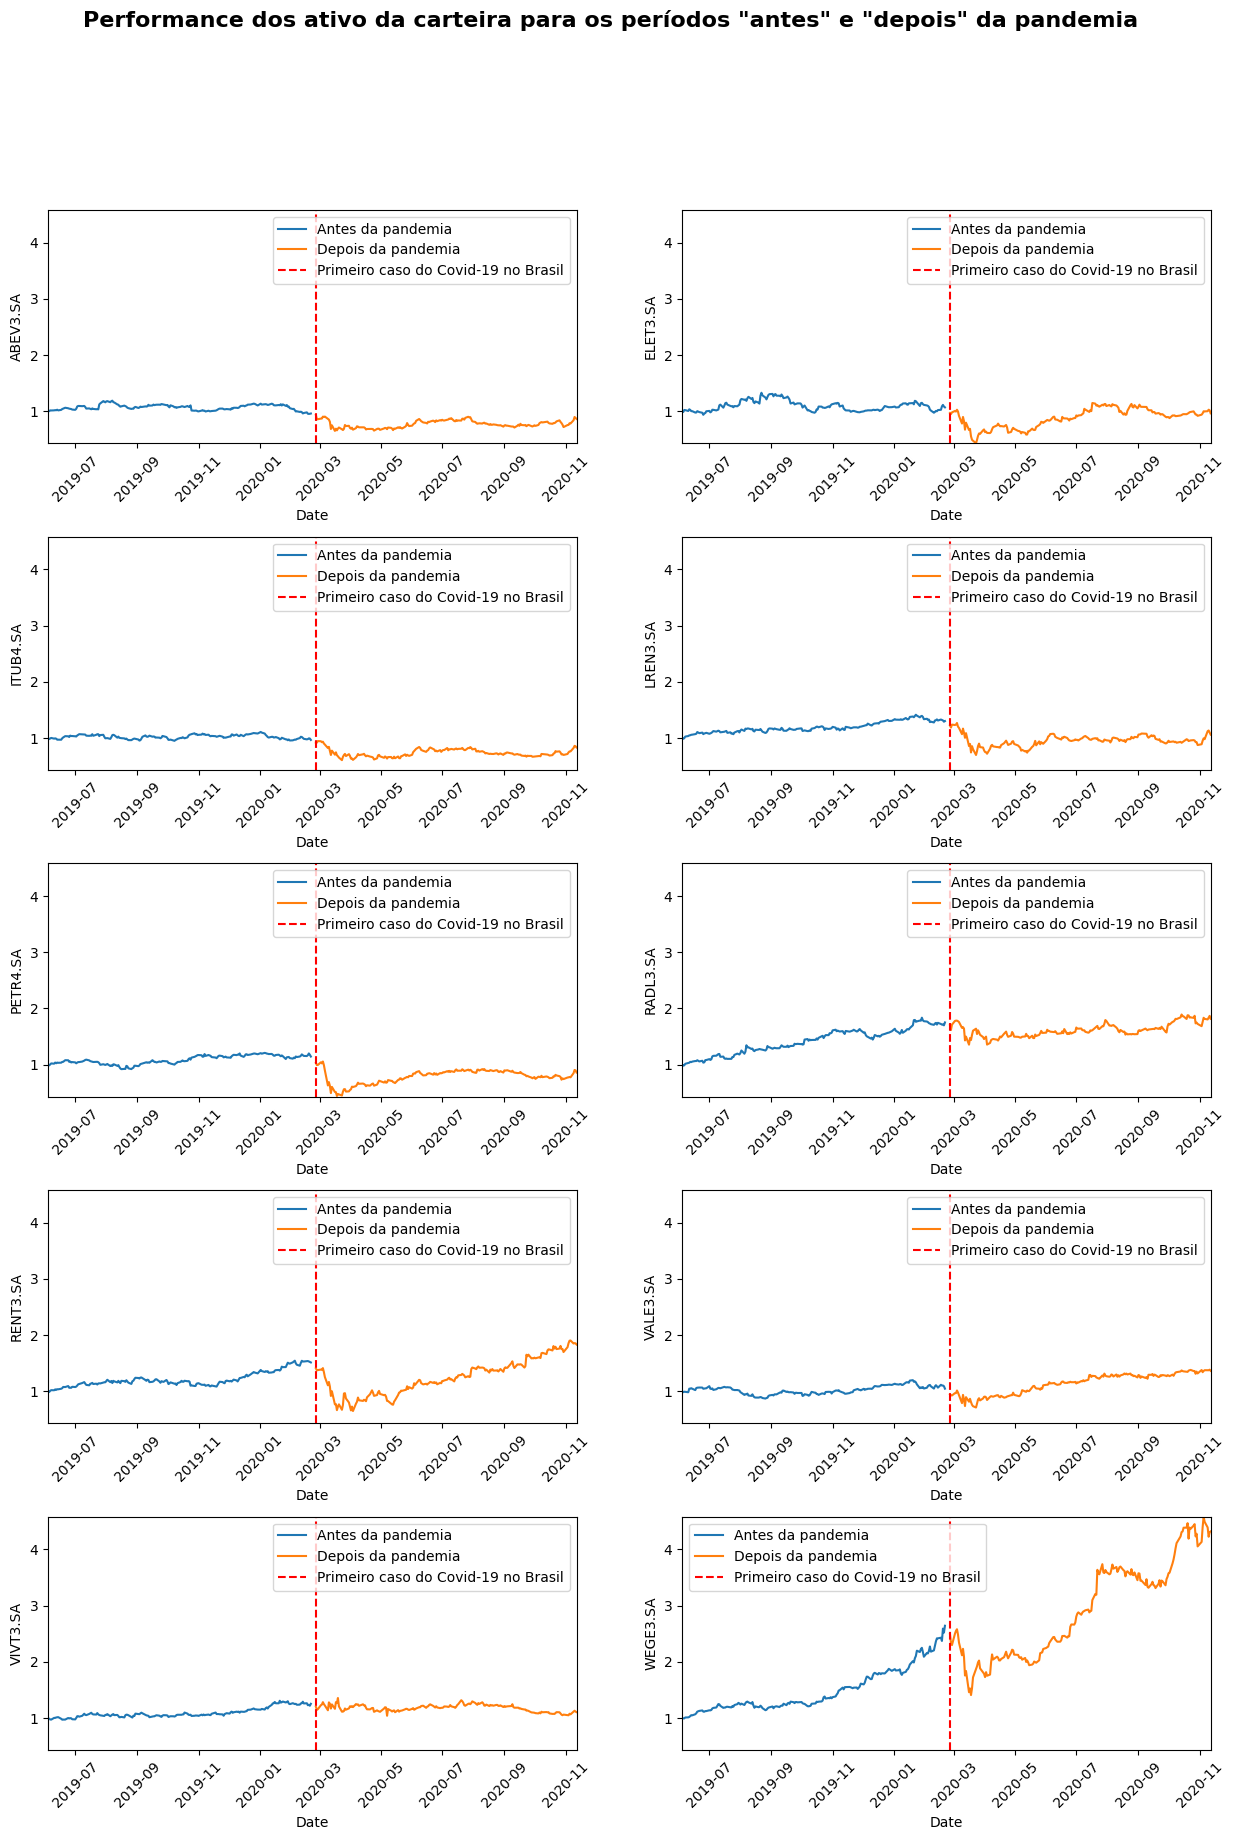

In [14]:
# Define o tamanho da matriz
nrows = 5
ncols = 2
ticker = np.array(df_precos_normalizados.columns).reshape(nrows, ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 20))

# Adiciona espaçamento entre os subplots
plt.subplots_adjust(hspace=0.4, wspace=0.2)

xlim_min = df_precos_normalizados.index.min()
xlim_max = df_precos_normalizados.index.max()

ylim_min = df_precos_normalizados.min().min()
ylim_max = df_precos_normalizados.max().max()

for i in range(nrows):
  for j in range(ncols):
    sns.lineplot(x=antes_pandemia.index, y=antes_pandemia[ticker[i,j]], label='Antes da pandemia', ax=axs[i,j])
    sns.lineplot(x=depois_pandemia.index, y=depois_pandemia[ticker[i,j]], label='Depois da pandemia', ax=axs[i,j])
    axs[i,j].axvline(x=pd.to_datetime('2020-02-26'), color='red', linestyle='--', label='Primeiro caso do Covid-19 no Brasil')
    #padronizando os dois eixos para todos os plots
    axs[i,j].set_xlim(xlim_min, xlim_max)
    axs[i,j].set_ylim(ylim_min, ylim_max)
    #axs[i,j].set_title(f"Preços de {ticker[i, j]} antes e depois da pandemia.")
    axs[i,j].legend()

    # Ajustar o eixo x para 45 graus
    axs[i,j].tick_params(axis='x', rotation=45)

# Adicionar título geral
fig.suptitle('Performance dos ativo da carteira para os períodos "antes" e "depois" da pandemia', fontsize=16, fontweight='bold')

# Exibir os gráficos
plt.show()

In [15]:
retornos = df_precos_antes_depois.pct_change().dropna()
retornos.head()

ABEV3.SA  ELET3.SA  ITUB4.SA  LREN3.SA  PETR4.SA  RADL3.SA  \
Date                                                                     
2019-06-05  0.003511 -0.012570 -0.019353 -0.013588 -0.012141 -0.017788   
2019-06-06  0.013296  0.037186  0.010405  0.009965  0.015642  0.006299   
2019-06-07 -0.001381 -0.002261  0.010653  0.029309  0.018702  0.027387   
2019-06-10  0.002075 -0.015215 -0.012649  0.009304 -0.004320  0.015232   
2019-06-11  0.004141  0.029915  0.004982  0.011173  0.019523  0.003751   

            RENT3.SA  VALE3.SA  VIVT3.SA  WEGE3.SA  
Date                                                
2019-06-05 -0.011818 -0.014655 -0.012686 -0.006787  
2019-06-06  0.019933  0.008228 -0.013171  0.000000  
2019-06-07  0.012928 -0.002825 -0.003255  0.015945  
2019-06-10 -0.001781 -0.006610  0.032005  0.002242  
2019-06-11  0.014868  0.064005  0.000000  0.006711

In [16]:
# Calcular a volatilidade (desvio padrão) dos retornos
volatilidade = retornos.std().sort_values(ascending=False)

# Imprimir a volatilidade em termos percentuais
for stock, vol in volatilidade.items():
    print(f'{stock}: {vol * 100:.2f}%')

ELET3.SA: 4.14%
RENT3.SA: 4.04%
PETR4.SA: 3.66%
LREN3.SA: 3.40%
WEGE3.SA: 3.15%
VALE3.SA: 3.04%
ITUB4.SA: 2.65%
ABEV3.SA: 2.56%
RADL3.SA: 2.41%
VIVT3.SA: 2.35%


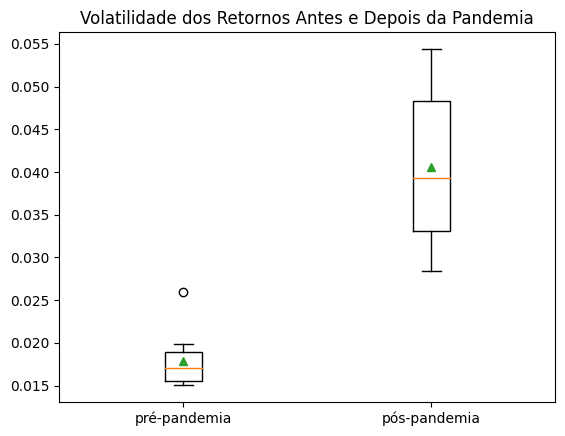

In [17]:
# Separando os retornos por período pré-pandemia e pós-pandemia:
retornos['Periodo'] = np.where(retornos.index < '2020-02-26', 'pré-pandemia', 'pós-pandemia')


# Calculando os riscos para os dois períodos
riscos_comparados = retornos.pivot_table(
    columns=retornos['Periodo'],
    values=retornos.columns.values[:-1],
    aggfunc='std')

plt.boxplot(riscos_comparados, showmeans=True, labels=['pré-pandemia','pós-pandemia'])

plt.title('Volatilidade dos Retornos Antes e Depois da Pandemia')

plt.show()

In [18]:
# Realizar o teste t pareado unicaudal (uma cauda)
# alternative='greater': a média da distribuição subjacente à primeira amostra é superior à média da distribuição subjacente à segunda amostra.
resultado_teste = ttest_rel(riscos_comparados['pós-pandemia'], riscos_comparados['pré-pandemia'], alternative='greater')

# Exibir o resultado do teste
print(f'Estatística t: {resultado_teste.statistic:.4f}')
print(f'Valor p: {resultado_teste.pvalue:.4f}')

# Verificar a significância
alpha = 0.01
if resultado_teste.pvalue < alpha:
    print(f'Rejeita-se a hipótese nula. \nA média do risco das ações após a pandemia é estatisticamente maior do que antes da pandemia com uma confiança de {1 - alpha:.0%}.')
else:
    print('Não há evidências para rejeitar a hipótese nula. A média do risco das ações após a pandemia não é estatisticamente maior do que antes da pandemia.')


Estatística t: 8.3010
Valor p: 0.0000
Rejeita-se a hipótese nula. 
A média do risco das ações após a pandemia é estatisticamente maior do que antes da pandemia com uma confiança de 99%.


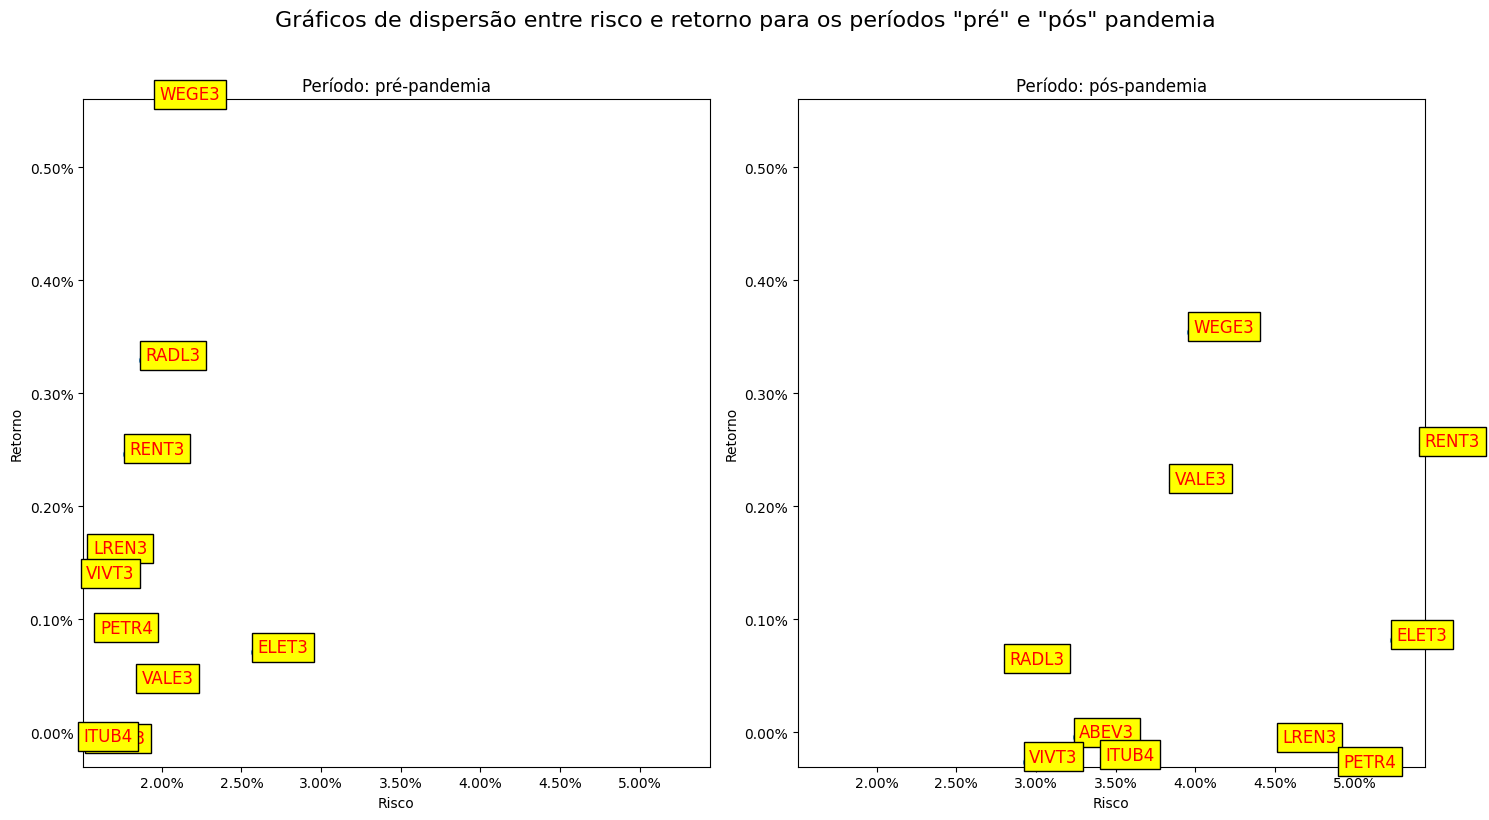

In [19]:
# Transforma a tabela de formato largo para formato longo
df_retornos_vertical = retornos.melt(id_vars=['Periodo'], var_name='Código', value_name='Retorno', ignore_index=False)

df_risco_retorno = df_retornos_vertical.groupby(['Código', 'Periodo'])['Retorno'].agg([('Risco', 'std'), ('Retorno', 'mean')]).reset_index().set_index('Código')



# Criar dois gráficos separados
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

xlim_min = df_risco_retorno.Risco.min()
xlim_max = df_risco_retorno.Risco.max()

ylim_min = df_risco_retorno.Retorno.min()
ylim_max = df_risco_retorno.Retorno.max()


# Iterar sobre os períodos "antes" e "depois"
for i, periodo in enumerate(df_risco_retorno['Periodo'].unique()):
    df_periodo = df_risco_retorno[df_risco_retorno['Periodo'] == periodo]

    # Gráfico de dispersão
    sns.scatterplot(data=df_periodo, x='Risco', y='Retorno', ax=axes[i], s=100)


    # Adicionar labels para cada ponto
    for index, row in df_periodo.iterrows():
        axes[i].text(x=row['Risco'], y=row['Retorno'], s=index[:-3],
                     fontdict=dict(color='red', size=12),
                     bbox=dict(facecolor='yellow'))

    # Adicionar título para cada gráfico
    axes[i].set_xlim(xlim_min, xlim_max)
    axes[i].set_ylim(ylim_min, ylim_max)
    axes[i].set_title(f'Período: {periodo}')

    # Formatar os eixos x e y para percentagem
    axes[i].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axes[i].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    

# Adicionar título geral
fig.suptitle('Gráficos de dispersão entre risco e retorno para os períodos "pré" e "pós" pandemia', y=1.02, fontsize=16)


# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

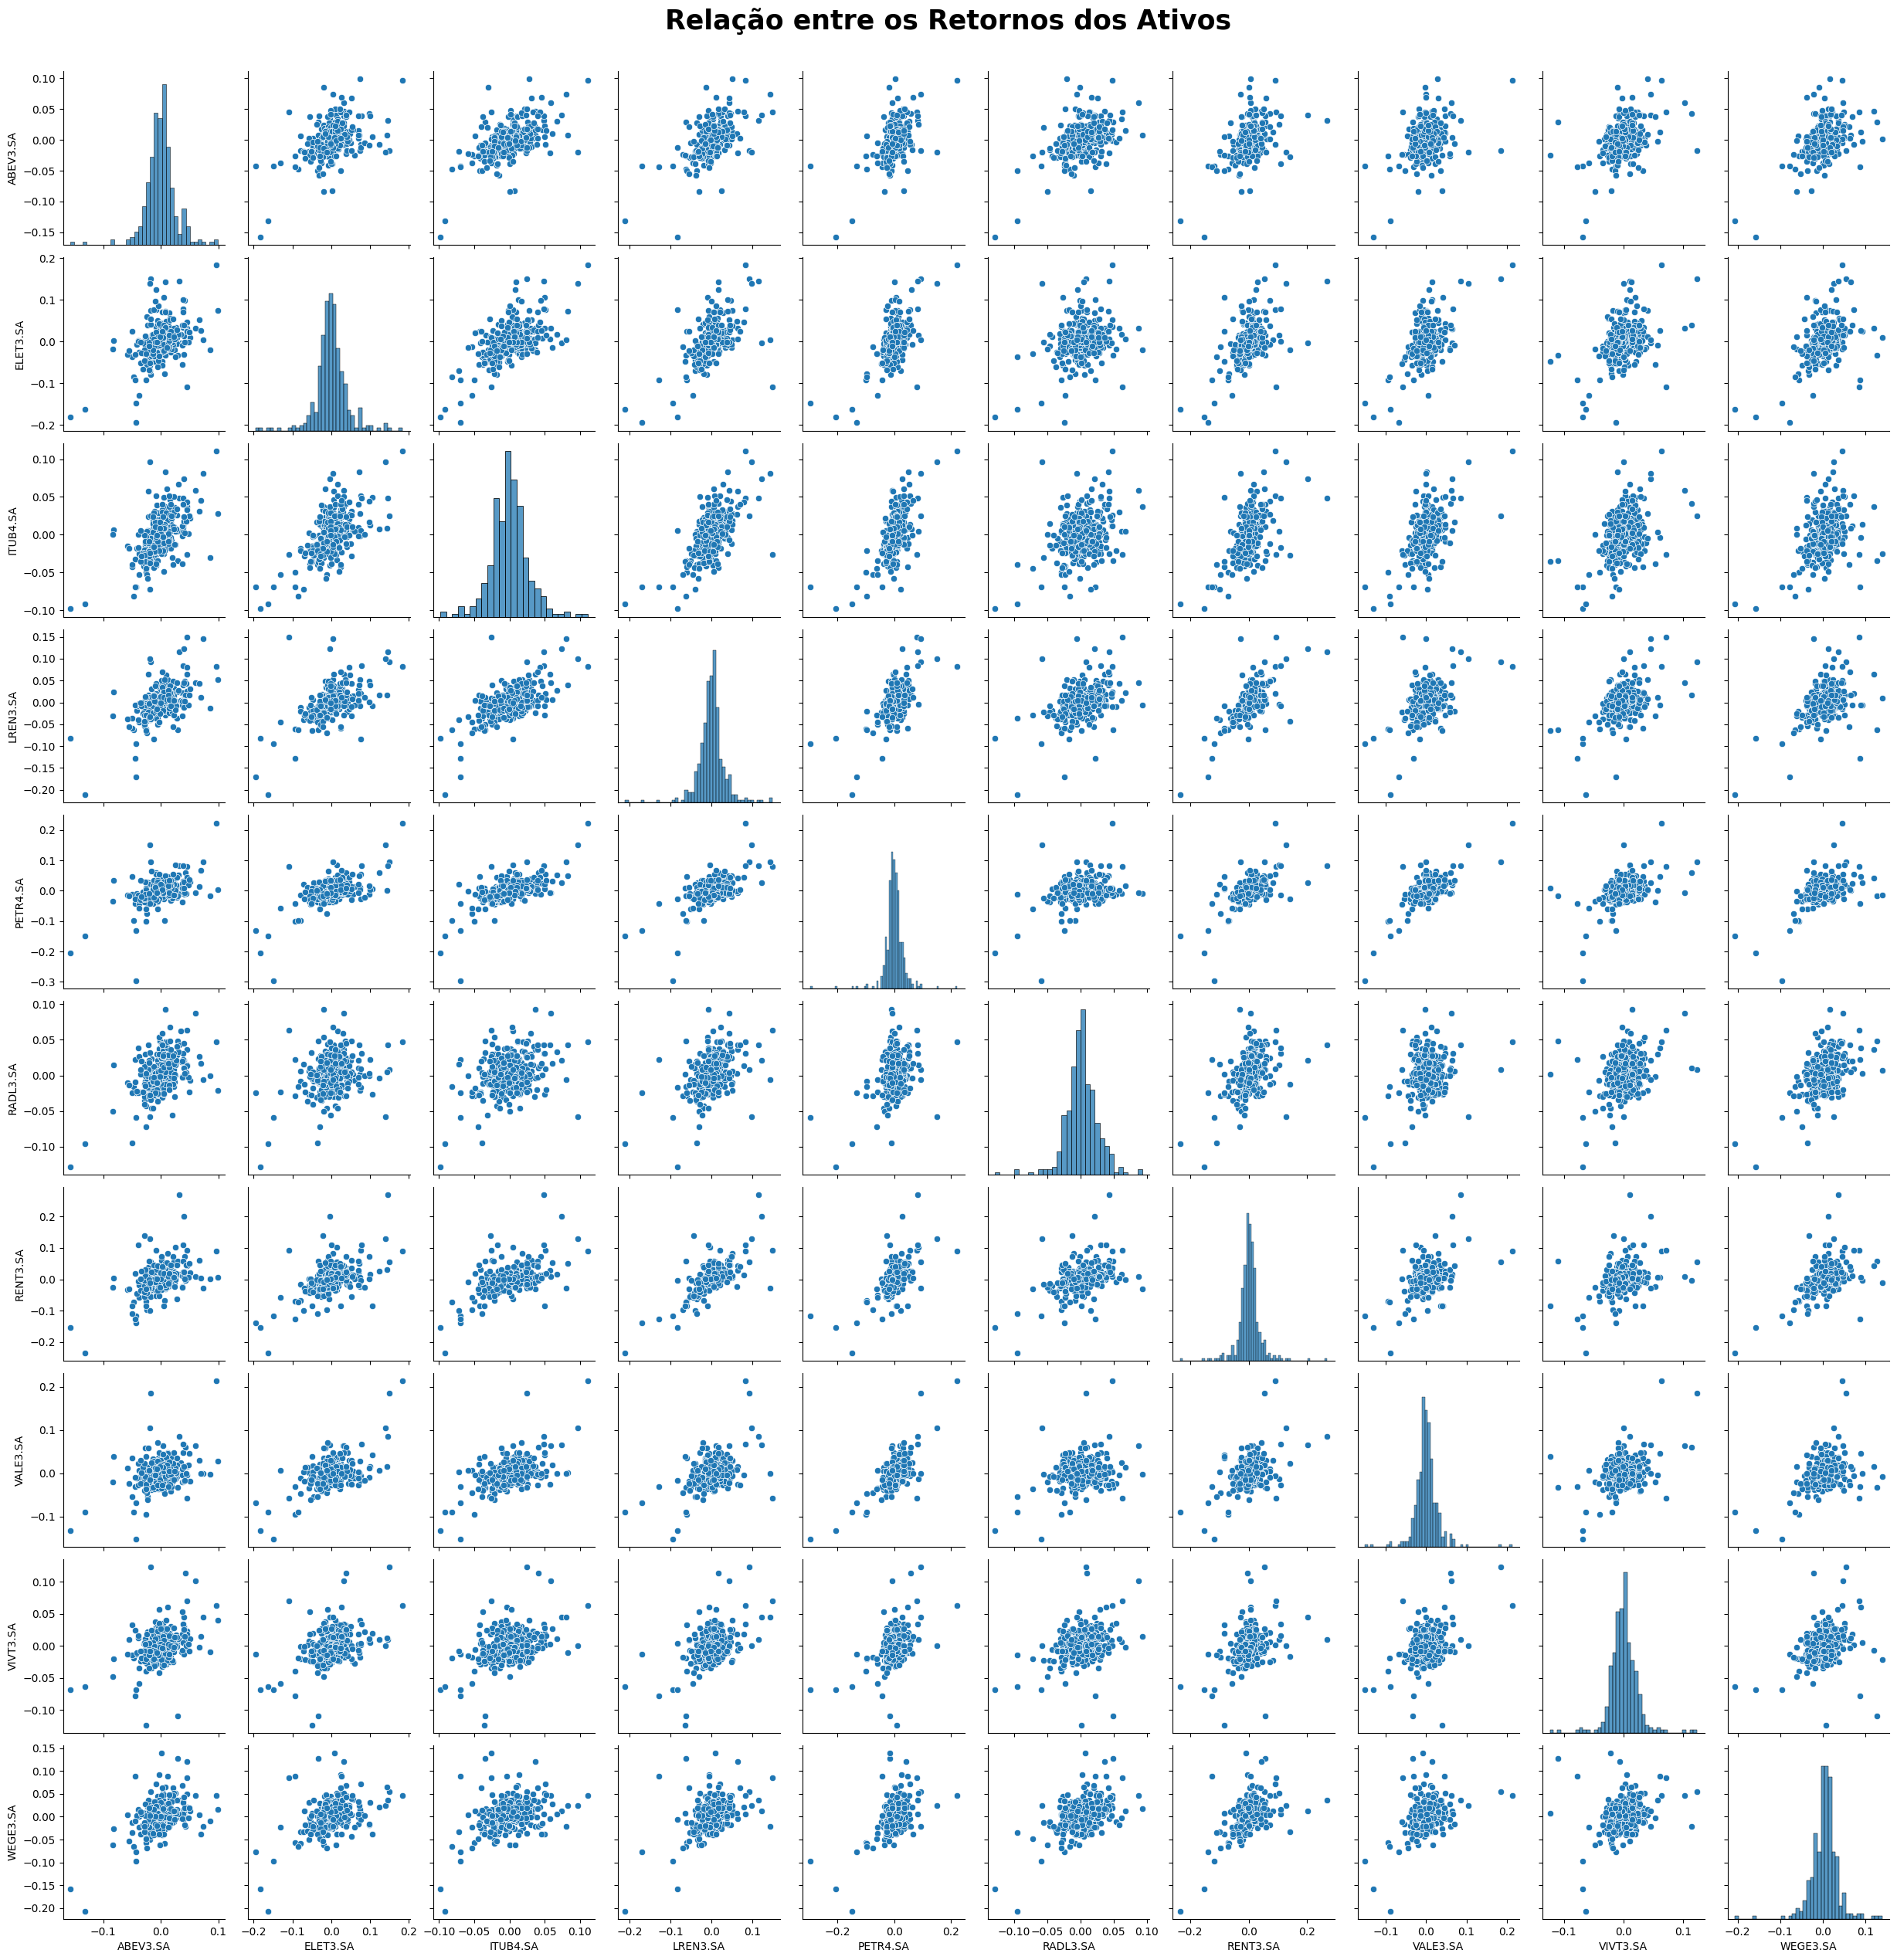

In [20]:
sns.pairplot(retornos)
plt.suptitle("Relação entre os Retornos dos Ativos", y=1.02, fontsize=25, fontweight='bold')
plt.show()

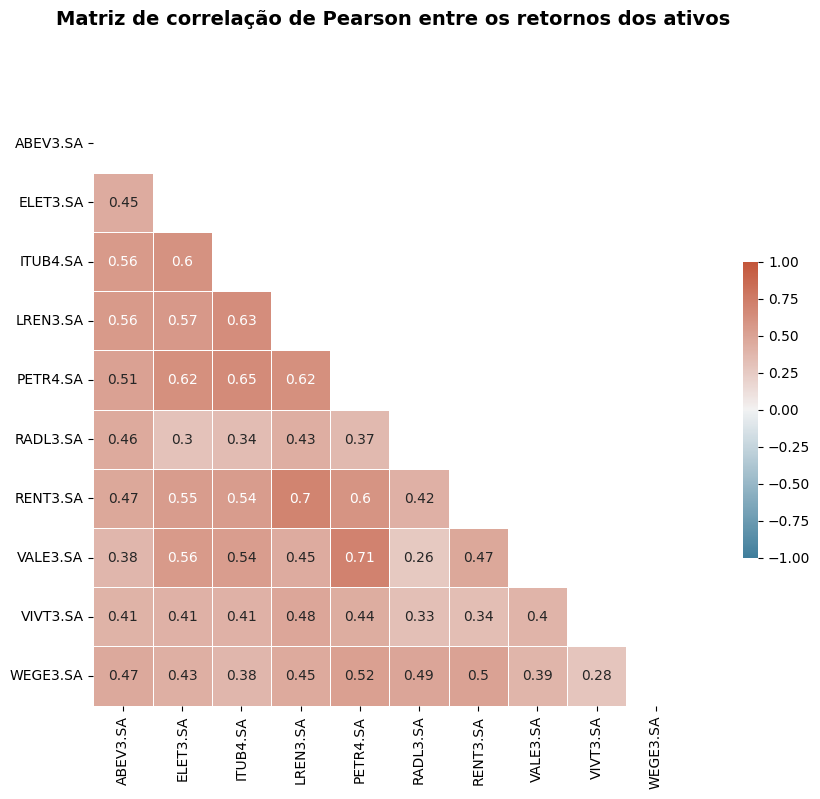

In [21]:
# Matriz de correlação de Pearson para cada par de ações
corr = retornos[retornos.columns[:-1]].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a figura matplotlib
f, ax = plt.subplots(figsize=(15, 8))

# Gere um mapa de cores divergente personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Define os limites da escala de cores
vmin, vmax = -1, 1

# Desenhe o mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=vmin, vmax=vmax, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

plt.subplots_adjust(top=0.85)
plt.suptitle('Matriz de correlação de Pearson entre os retornos dos ativos',x=0.55, fontsize=14, fontweight='bold')
plt.show()

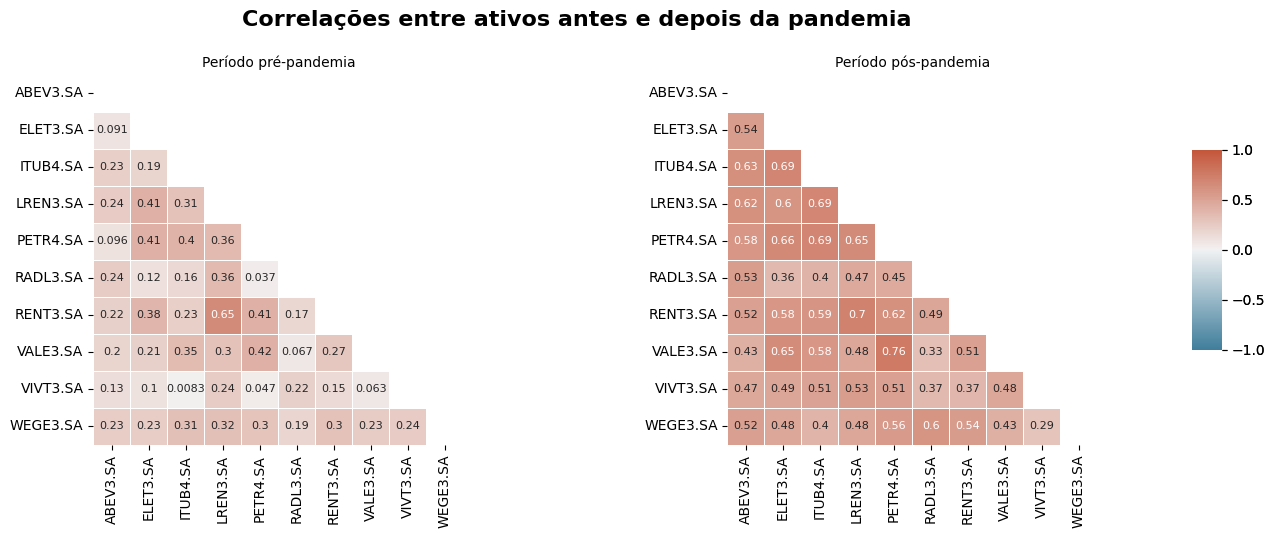

In [22]:
# Separando os períodos
antes_pandemia = retornos.query('Periodo == "pré-pandemia"')[retornos.columns[:-1]]
depois_pandemia = retornos.query('Periodo == "pós-pandemia"')[retornos.columns[:-1]]


# Função para gerar mapa de calor
def plot_heatmap(corr, ax, title):
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    vmin, vmax = -1, 1
    cbar_ax = ax.figure.add_axes([.91, .3, .02, .4])  # Define a posição da barra de cores
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=vmin, vmax=vmax, center=0, annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax,
                annot_kws={"size": 8}, cbar_ax=cbar_ax)  # Usa a mesma barra de cores
    ax.set_title(title, fontsize=10)  # Reduza o tamanho do título

# Calcula as correlações para ambos os períodos
corr_antes = antes_pandemia.corr()
corr_depois = depois_pandemia.corr()

# Cria um único subplot para ambos os mapas de calor
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Gera mapas de calor para antes e depois da pandemia
plot_heatmap(corr_antes, ax[0], 'Período pré-pandemia')
plot_heatmap(corr_depois, ax[1], 'Período pós-pandemia')

# Adiciona uma legenda geral
fig.subplots_adjust(top=0.85)
fig.suptitle('Correlações entre ativos antes e depois da pandemia', fontsize=16, fontweight='bold')

# Mostra o gráfico
plt.show()


In [23]:
retornos_180dias = retornos.drop('Periodo', axis=1).iloc[-180:].copy()

In [24]:
retorno_carteira = retornos_180dias.mean(1)

# Realização de Teste de Hipóteses para avaliar Normalidade

normalidade = shapiro(retorno_carteira)
print('Carteira Estatística=%.3f, p-valor=%.3f\n' % (normalidade.statistic, normalidade.pvalue))


for ticker in retornos_180dias:
    normalidade = shapiro(retornos_180dias[ticker])
    print(ticker, 'Estatística=%.3f, p-valor=%.3f\n' % (normalidade.statistic, normalidade.pvalue))

Carteira Estatística=0.898, p-valor=0.000

ABEV3.SA Estatística=0.947, p-valor=0.000

ELET3.SA Estatística=0.928, p-valor=0.000

ITUB4.SA Estatística=0.993, p-valor=0.508

LREN3.SA Estatística=0.937, p-valor=0.000

PETR4.SA Estatística=0.836, p-valor=0.000

RADL3.SA Estatística=0.951, p-valor=0.000

RENT3.SA Estatística=0.905, p-valor=0.000

VALE3.SA Estatística=0.856, p-valor=0.000

VIVT3.SA Estatística=0.895, p-valor=0.000

WEGE3.SA Estatística=0.911, p-valor=0.000



In [25]:
# Calcular a volatilidade (desvio padrão) dos retornos dos ultimos 180 dias
volatilidade = retornos_180dias.std().sort_values(ascending=False)

print('Volatilidade dos ativos em 180 dias:')
# Imprimir a volatilidade em termos percentuais
for codigo, vol in volatilidade.items():
    print(f'{codigo}: {vol * 100:.2f}%')

Volatilidade dos ativos em 180 dias:
RENT3.SA: 5.44%
ELET3.SA: 5.26%
PETR4.SA: 4.93%
LREN3.SA: 4.55%
WEGE3.SA: 3.99%
VALE3.SA: 3.87%
ITUB4.SA: 3.44%
ABEV3.SA: 3.27%
VIVT3.SA: 2.96%
RADL3.SA: 2.84%


In [26]:
print(f"Volatilidade da carteira em 180 dias (pesos iguais): {retornos_180dias.mean(1).std() * 100:.2f}%")

print(f"Volatilidade da carteira em 180 dias (pesos ponderados): {(retornos_180dias[Carteira['Código'].values] @ Carteira['Peso'].values).std() * 100:.2f}%")

Volatilidade da carteira em 180 dias (pesos iguais): 3.12%
Volatilidade da carteira em 180 dias (pesos ponderados): 3.37%


In [27]:
# Calcula o patrimônio de cada ativo na carteira
Portfolio = Carteira[['Código', 'Peso']].copy().set_index('Código')
Portfolio['Patrimonio'] = round(Portfolio['Peso'] * 1_000_000, 2)

# Define uma função lambda para calcular o VaR (Value at Risk) no nível de 5%
VaR = lambda returns: np.percentile(returns, 5)

Portfolio['VaR'] = retornos_180dias.apply(VaR)

# Calcula o VaR em termos monetários para cada ativo
Portfolio['VaR(R$)'] = round(Portfolio['Patrimonio'] * Portfolio['VaR'],2)

Portfolio

Peso  Patrimonio       VaR   VaR(R$)
Código                                            
VALE3.SA  0.317285   317284.72 -0.045248 -14356.57
PETR4.SA  0.181011   181010.69 -0.059624 -10792.60
ITUB4.SA  0.166725   166724.65 -0.052865  -8813.97
ELET3.SA  0.089125    89125.44 -0.078586  -7004.04
ABEV3.SA  0.062038    62037.62 -0.044361  -2752.07
RENT3.SA  0.054199    54198.85 -0.083662  -4534.40
WEGE3.SA  0.053712    53711.82 -0.056211  -3019.18
RADL3.SA  0.037431    37431.29 -0.040960  -1533.20
VIVT3.SA  0.022171    22171.20 -0.039855   -883.62
LREN3.SA  0.016304    16303.72 -0.062918  -1025.80

In [28]:
retornos_carteira_180dias = retornos_180dias[Carteira['Código'].values] @ Carteira['Peso'].values
VaR_carteira = np.percentile(retornos_carteira_180dias, 5)
print(f"VaR da carteira em 180 dias: {VaR_carteira:.02%}")

VaR da carteira em 180 dias: -4.40%


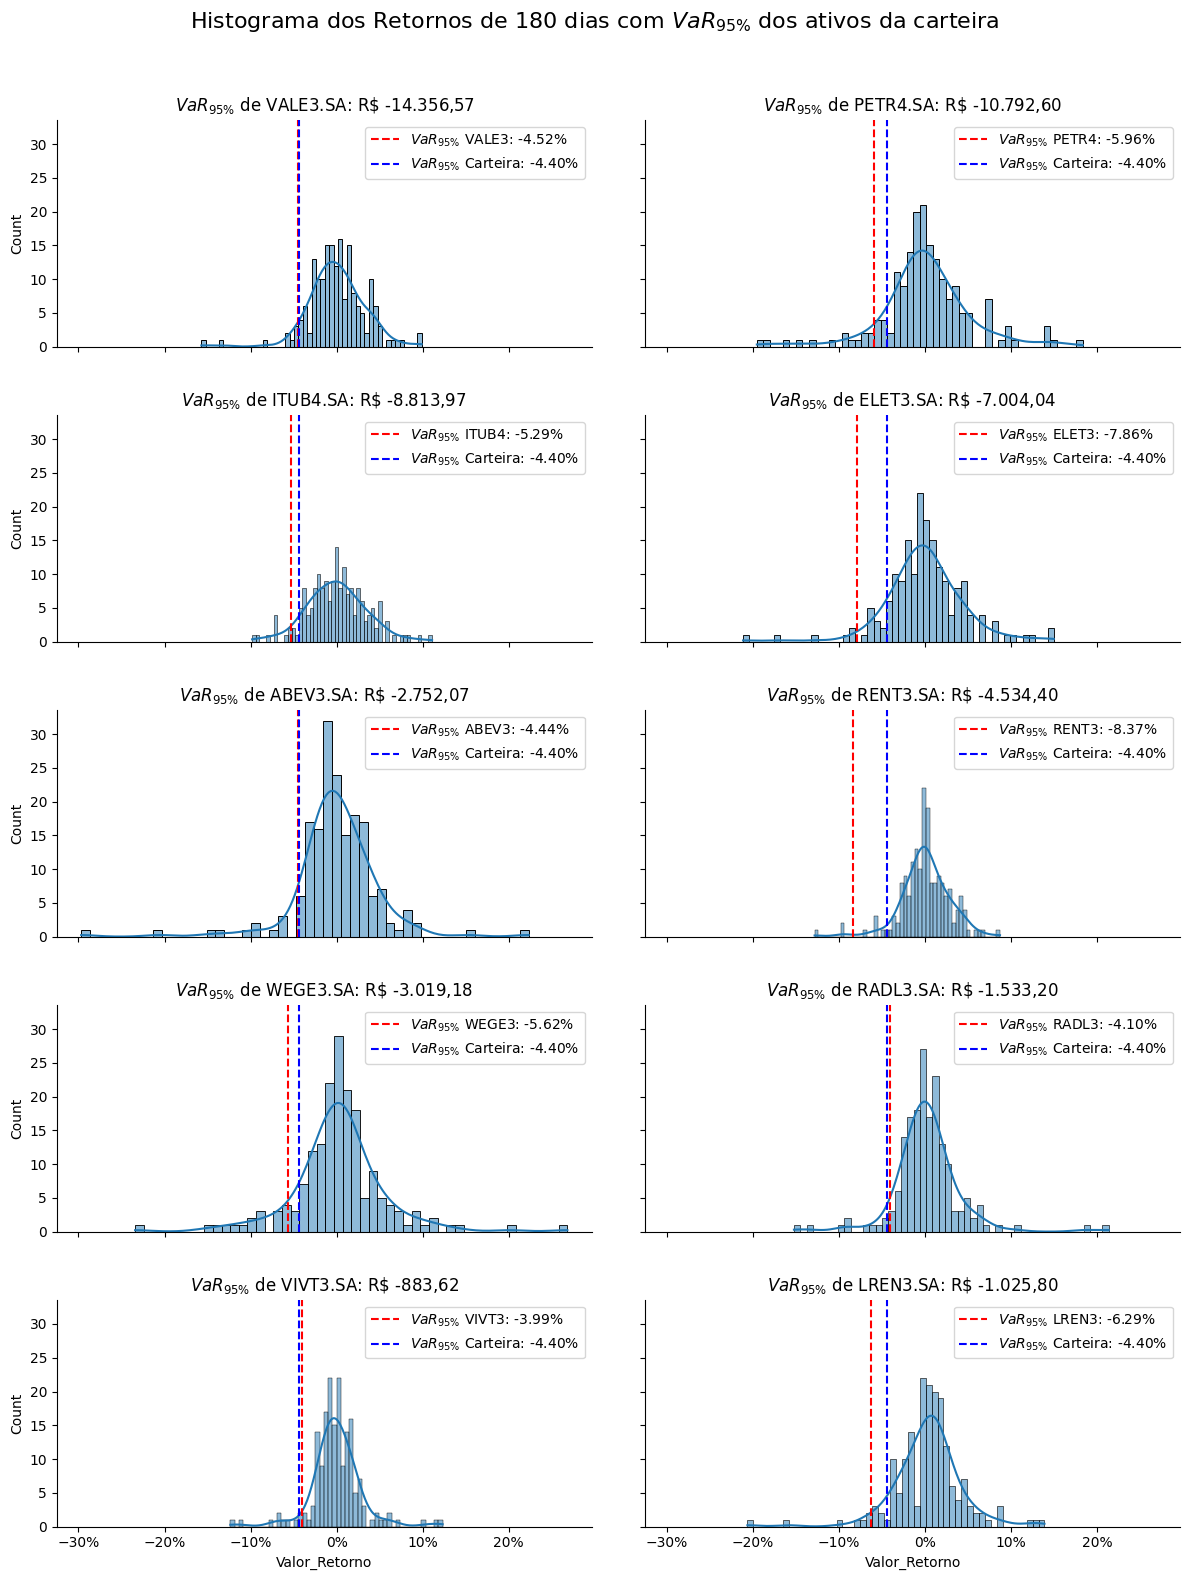

In [29]:
df_melted = retornos_180dias.melt(var_name='Código', value_name='Valor_Retorno')

template = '{VaR_95} de {col_name}: R\$ {var}' 

# Plotar histogramas separados para cada variável
g = sns.FacetGrid(df_melted, col='Código', col_wrap=2, aspect=2)
g.map(sns.histplot, 'Valor_Retorno', bins=50, kde=True)

# Adicionar linhas verticais para VaR em cada gráfico
for ax, codigo in zip(g.axes.flat, Portfolio.index):
    var_perc = Portfolio.loc[codigo]['VaR']
    var_valor = Portfolio.loc[codigo]['VaR(R$)']
    ax.axvline(var_perc, color='red', linestyle='--', label=r'$VaR_{95\%}$ ' + f'{codigo[:-3]}: {var_perc:.02%}')
    ax.axvline(VaR_carteira, color='blue', linestyle='--', label=r'$VaR_{95\%}$ ' + f'Carteira: {VaR_carteira:.02%}')
    ax.set_title(template.format(VaR_95 = r'$VaR_{95\%}$', col_name=codigo, var=valor(var_valor)))
    ax.legend()
    # Formatar os eixos x para percentagem
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Adicionar título geral
g.figure.suptitle(r'Histograma dos Retornos de 180 dias com $VaR_{95\%}$ dos ativos da carteira', y=1.05, fontsize=16)

# Ajustar o espaço entre os subplots
plt.subplots_adjust(wspace=0.1, hspace=0.3)

plt.show()


In [30]:
def calcula_VaR_carteira(df, start, end, ativos, pesos, valor_investido):

    ativos = ativos.copy()
    pesos = pesos.copy()

    # Seleciona o período histórico de preços definido por 'start' e 'end'
    horizonte_tempo = df.loc[start: end].copy()

    # Remove duplicatas dos dados históricos
    horizonte_tempo.drop_duplicates(inplace=True)

    # Calcula os retornos diários da carteira ponderada pelos pesos dos ativos
    retornos_diarios = horizonte_tempo.pct_change().dropna()
    # Calculando o valor investido em cada ativo
    patrimonio = [peso * valor_investido for peso in pesos]
    retornos_carteira = retornos_diarios[ativos] @ patrimonio

    # Calcula o VaR realizado do periodo
    VaR = np.percentile(retornos_carteira, 5)

    return VaR, retornos_carteira

In [31]:
valor_investido = 1_000_000
ativos = ['VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'ELET3.SA', 'ABEV3.SA', 'RENT3.SA', 'WEGE3.SA', 'RADL3.SA', 'VIVT3.SA', 'LREN3.SA']
pesos = [0.31728472, 0.18101069, 0.16672465, 0.08912544, 0.06203762, 0.05419885, 0.05371182, 0.03743129, 0.0221712 , 0.01630372]

# VaR da carteira do investidor utilizando como período histórico 01/01/2019 até 30/06/2019
start='2019-01-01'
end='2019-06-30'

VaR_historico, retorno_historico = calcula_VaR_carteira(df_precos, start, end, ativos, pesos, valor_investido)
print(f'VaR da carteira do investidor 01/01/2019 até 30/06/2019: R$ {valor(VaR_historico)}')

# VaR da carteira do investidor utilizando como período histórico 01/07/2019 até 31/12/2019
start='2019-07-01'
end='2019-12-31'

VaR_realizado, retorno_realizado = calcula_VaR_carteira(df_precos, start, end, ativos, pesos, valor_investido)
print(f'VaR da carteira do investidor 01/07/2019 até 31/12/2019: R$ {valor(VaR_realizado)}')

VaR da carteira do investidor 01/01/2019 até 30/06/2019: R$ -21.246,06
VaR da carteira do investidor 01/07/2019 até 31/12/2019: R$ -19.041,90


Previsto: Espera-se que em 5% dos dias do período (6 dias) a perda seja maior ou igual a R$ -21.246,06.
Realizado: Em 3 dias do período a perda foi maior ou igual ao VaR previsto.


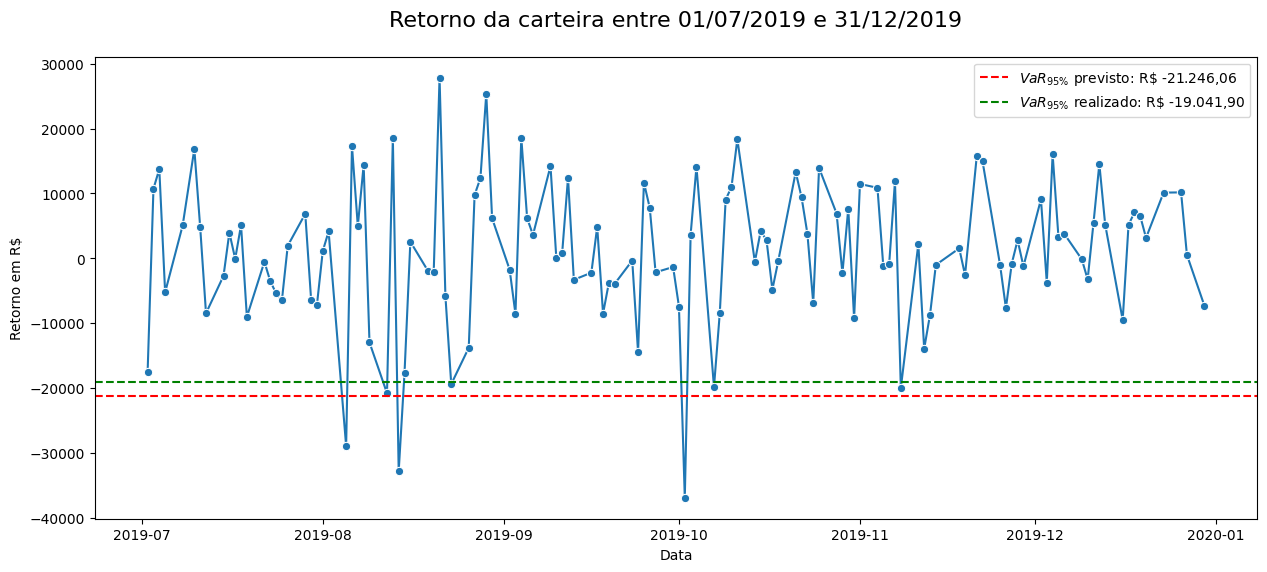

In [32]:
# Calcula os 5% dos dias do periodo
dias_esperado = round(retorno_realizado.count() * 0.05)

# Função lambda para contar dias com perda maior ou igual ao VaR previsto
conta_dias_perda = lambda x: 0 if x >= VaR_historico else 1
s = retorno_realizado.apply(conta_dias_perda)
dias_perda_realizado = retorno_realizado.apply(conta_dias_perda).sum()


print(f'Previsto: Espera-se que em 5% dos dias do período ({dias_esperado} dias) a perda seja maior ou igual a R$ {valor(VaR_historico)}.')
print(f'Realizado: Em {dias_perda_realizado} dias do período a perda foi maior ou igual ao VaR previsto.')


# Visualizando os retornos
plt.figure(figsize=(15, 6))
sns.lineplot(retorno_realizado, marker='o')
plt.axhline(VaR_historico, color='red', linestyle='--', label=r'$VaR_{95\%}$ previsto: '+ f'R\$ {valor(VaR_historico)}')
plt.axhline(VaR_realizado, color='green', linestyle='--', label=r'$VaR_{95\%}$ realizado: '+ f'R\$ {valor(VaR_realizado)}')
plt.legend()

plt.title('Retorno da carteira entre 01/07/2019 e 31/12/2019', y=1.05, fontsize=16)

plt.ylabel('Retorno em R$')
plt.xlabel('Data')

plt.show()


In [33]:
# Definindo uma função para calcular os retornos periódicos da carteira
def calcula_retornos_ponderados(retorno_geral, ativos, pesos, freq='M'):
    # Inicializa uma lista para armazenar os dados de retornos ponderados
    dados_retornos = []

    # Itera sobre os dados agrupados por período
    for periodo, dados_periodo in retorno_geral.resample(freq):
        # Calcula os retornos percentuais por periodo e remove quaisquer valores nulos
        dados_periodo_retornos = dados_periodo.pct_change().dropna()

        # Calcula o retorno ponderado da carteira
        dados_periodo_retornos['Retorno ponderado'] = dados_periodo_retornos[ativos] @ pesos

        # Mantém apenas o retorno ponderado na série de dados do periodo
        dados_periodo_retornos = dados_periodo_retornos[['Retorno ponderado']]
        
        # Adiciona os dados de retorno ponderado à lista de retornos
        dados_retornos.append((periodo, dados_periodo_retornos))

    return dados_retornos



# Definindo uma função para calcular o VaR dos retornos periódicos da carteira
def calcula_VaR(dados_retornos):
    # Inicializa uma lista para armazenar os dados de VaR
    dados_linhas = []

    # Define uma função lambda para calcular o VaR (Value at Risk) no nível de 5%
    VaR = lambda returns: np.percentile(returns, 5)

    # Itera sobre os dados de retornos ponderados
    for periodo, dados_periodo in dados_retornos:
        # Aplica a função VaR aos dados do período e obtém o VaR para esse período
        var_periodo = VaR(dados_periodo['Retorno ponderado'])

        dias_observados = dados_periodo['Retorno ponderado'].count()

        # Cria um dicionário para representar os dados deste período, incluindo o VaR calculado
        dados_VaR = {'Período': periodo,
                     'Qtd Dias': dias_observados,
                     'VaR': var_periodo}

        # Adiciona o dicionário de dados à lista de linhas de VaR
        dados_linhas.append(dados_VaR)

    # Converte a lista de dicionários de VaR em um DataFrame
    df = pd.DataFrame(dados_linhas)
    df['VaR Realizado'] = df['VaR'] * 1_000_000  # Converte o VaR para R$

    # Define 'Período' como o índice do DataFrame
    df.set_index('Período', inplace=True)

    return df

In [34]:
# Copiar o DataFrame de preços originais para evitar alterações no DataFrame original
retorno_geral = df_precos.copy()

# Remover quaisquer duplicatas no DataFrame de preços
retorno_geral.drop_duplicates(inplace=True)

# Calcular os retornos ponderados com base nos ativos e pesos fornecidos,
# e utilizando uma frequência semestral ('6MS')
retorno_ponderado = calcula_retornos_ponderados(retorno_geral, ativos, pesos, '6MS')

# Calcular o VaR com base nos retornos ponderados
df = calcula_VaR(retorno_ponderado)

In [35]:
df['Qtd Dias'].describe()

count     35.000000
mean     122.542857
std        1.686327
min      120.000000
25%      121.000000
50%      122.000000
75%      124.000000
max      126.000000
Name: Qtd Dias, dtype: float64

In [36]:
df['VaR Realizado'].describe()

count       35.000000
mean    -25458.559254
std      10723.820427
min     -66649.150638
25%     -26988.676003
50%     -22352.783724
75%     -19903.550161
max     -12108.141465
Name: VaR Realizado, dtype: float64

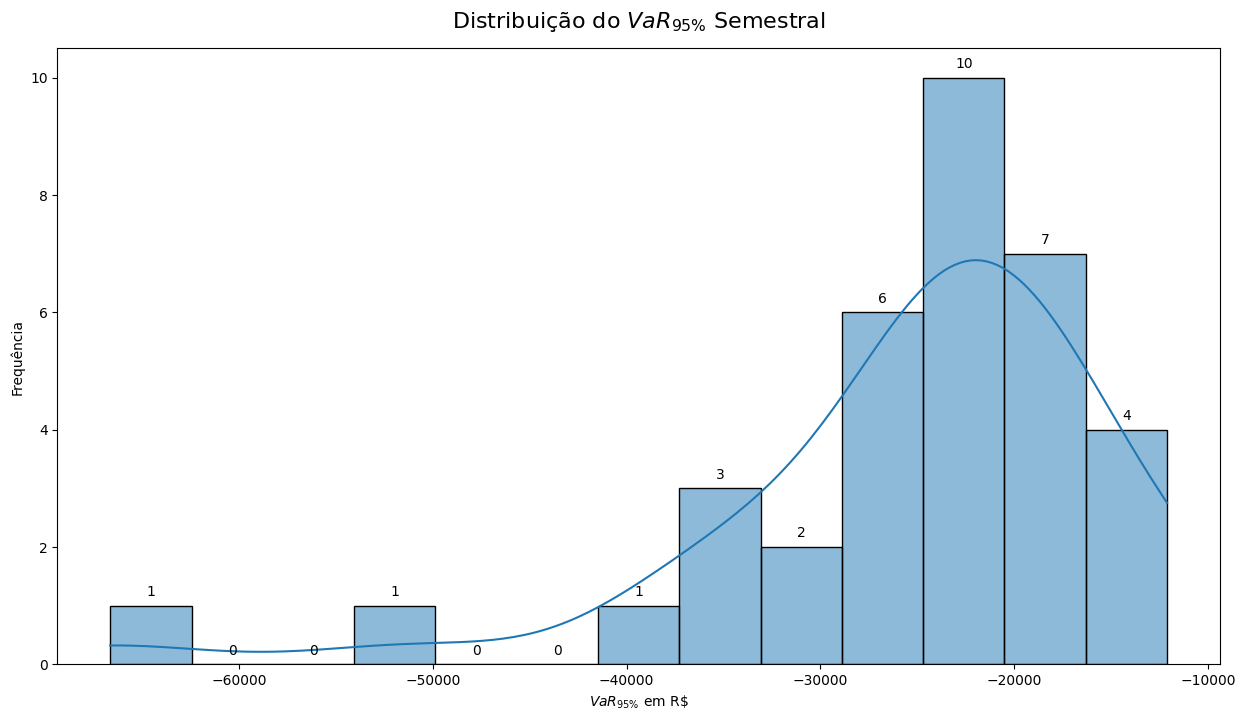

In [37]:
# distribuição do VaR Realizado
plt.figure(figsize=(15, 8))
histplot = sns.histplot(df['VaR Realizado'], kde=True)

# Adicionando as frequências no topo das barras
for patch in histplot.patches:
    height = patch.get_height()
    histplot.annotate(f'{height:.0f}', 
                      xy=(patch.get_x() + patch.get_width() / 2, height), 
                      xytext=(0, 5), 
                      textcoords='offset points', 
                      ha='center', 
                      va='bottom')

plt.title(r'Distribuição do $VaR_{95\%}$ Semestral', y=1.02, fontsize=16)
plt.xlabel(r'$VaR_{95\%}$ em R\$')
plt.ylabel('Frequência')
plt.show()

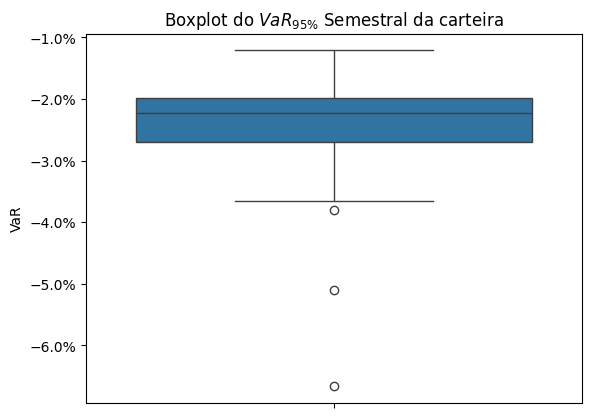

In [38]:
ax = sns.boxplot(y=df['VaR'])

plt.title(r'Boxplot do $VaR_{95\%}$ Semestral da carteira')
# Formatar os eixos x para percentagem
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('VaR')

plt.show()

In [39]:
# Detectando outliers no VaR Realizado usando o método do desvio interquartil
Q1 = df['VaR Realizado'].quantile(0.25)
Q3 = df['VaR Realizado'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['VaR Realizado'] < lower_bound) | (df['VaR Realizado'] > upper_bound)]

print(f'Frequência de "Cisnes Negros" na carteira: {len(outliers)/len(df):.2%}')
outliers

Frequência de "Cisnes Negros" na carteira: 8.57%


Qtd Dias       VaR  VaR Realizado
Período                                      
2008-07-01       126 -0.066649  -66649.150638
2016-01-01       122 -0.038039  -38039.093933
2020-01-01       122 -0.051083  -51082.567950

In [40]:
media_VaR = df['VaR Realizado'].mean()
mediana_VaR = df['VaR Realizado'].median()

plt.figure(figsize=(15, 6))
sns.lineplot(df['VaR Realizado'])
plt.axhline(media_VaR, color='red', linestyle='--', label=r'Média $VaR_{95\%}$: '+ f'R\$ {valor(media_VaR)}')
plt.axhline(mediana_VaR, color='green', linestyle='--', label=r'Mediana $VaR_{95\%}$: '+ f'R\$ {valor(mediana_VaR)}')


plt.legend()

plt.title(r'$VaR_{95\%}$ semestral no tempo', y=1.05, fontsize=16)

plt.ylabel('VaR em R$')
plt.xlabel('Data')

plt.show()

In [41]:
df_VaR_Anterior = df.copy()

# Adicionar uma coluna 'VaR Previsto' que é o VaR realizado do período anterior
df_VaR_Anterior['VaR Previsto'] = df_VaR_Anterior['VaR Realizado'].shift(1)

# Remover quaisquer linhas com valores NaN resultantes da operação shift
df_VaR_Anterior.dropna(inplace=True)

In [42]:
# Identificando acertos de valores previstos pelo VaR
acertos_VaR_anterior = df_VaR_Anterior['VaR Previsto'] <= df_VaR_Anterior['VaR Realizado']

print(f'Proporção de cenários otimistas utilizando o VaR anterior como preditor: {acertos_VaR_anterior.mean():.2%}')

# Visualizando os modelos no tempo
plt.figure(figsize=(15, 2))
sns.lineplot(df_VaR_Anterior[['VaR Realizado', 'VaR Previsto']])
plt.legend()
plt.title(r'$VaR_{95\%}$ semestral com o período anterior como preditor', y=1.05, fontsize=16)

plt.ylabel('VaR em R$')
plt.xlabel('Data')

plt.show()

Proporção de cenários otimistas utilizando o VaR anterior como preditor: 50.00%


In [43]:
# Calcular o erro como a diferença entre o VaR previsto e o VaR realizado
Erro_VaR_Anterior = df_VaR_Anterior['VaR Previsto'] - df_VaR_Anterior['VaR Realizado']

erro = np.sqrt( (Erro_VaR_Anterior ** 2).mean() )
print(f'O modelo utilizando o VaR anterior como preditor possui um erro de R$ {valor(erro)}')

O modelo utilizando o VaR anterior como preditor possui um erro de R$ 12.676,01


In [44]:
# Calculando a média móvel com janela de 2 períodos para VaR Realizado
df_media_movel = df[['VaR Realizado']].copy()
df_media_movel['VaR Previsto'] = df_media_movel['VaR Realizado'].rolling(window=2).mean().shift(1)
df_media_movel.head()

VaR Realizado  VaR Previsto
Período                                
2007-01-01  -21399.948757           NaN
2007-07-01  -35095.713753           NaN
2008-01-01  -32627.540504 -28247.831255
2008-07-01  -66649.150638 -33861.627129
2009-01-01  -35006.498329 -49638.345571

Proporção de cenários otimistas com a média de 2 períodos anteriores como preditor do VaR: 60.61%
O modelo utilizando o VaR médio de 2 períodos anteriores como preditor possui um erro de R$ 11.516,32


Proporção de cenários otimistas com a média de 3 períodos anteriores como preditor do VaR: 62.50%
O modelo utilizando o VaR médio de 3 períodos anteriores como preditor possui um erro de R$ 11.493,74


Proporção de cenários otimistas com a média de 4 períodos anteriores como preditor do VaR: 67.74%
O modelo utilizando o VaR médio de 4 períodos anteriores como preditor possui um erro de R$ 10.046,68


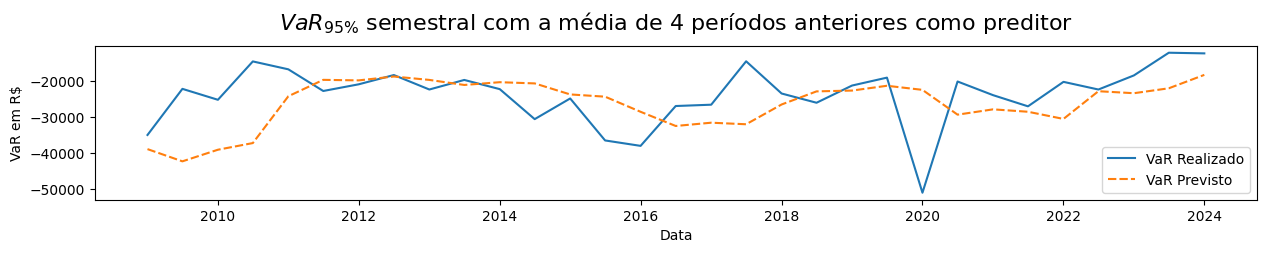

Proporção de cenários otimistas com a média de 5 períodos anteriores como preditor do VaR: 66.67%
O modelo utilizando o VaR médio de 5 períodos anteriores como preditor possui um erro de R$ 10.293,37


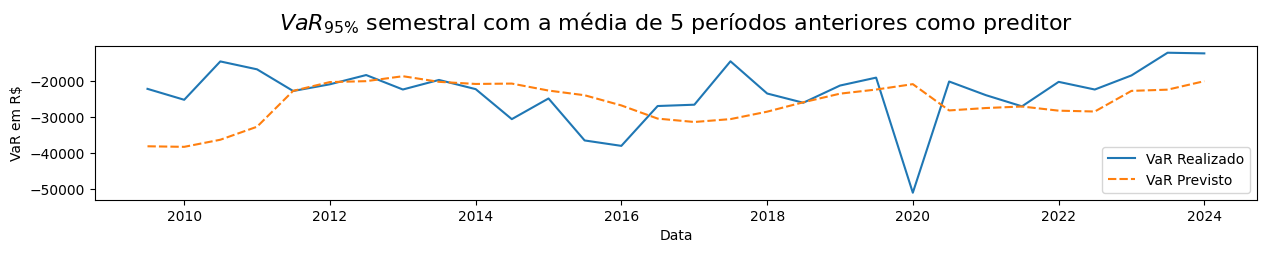

Proporção de cenários otimistas com a média de 6 períodos anteriores como preditor do VaR: 68.97%
O modelo utilizando o VaR médio de 6 períodos anteriores como preditor possui um erro de R$ 9.954,48


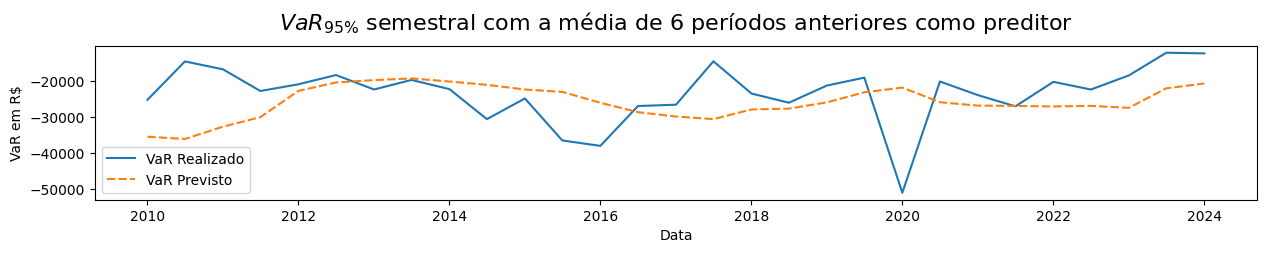

Proporção de cenários otimistas com a média de 7 períodos anteriores como preditor do VaR: 71.43%
O modelo utilizando o VaR médio de 7 períodos anteriores como preditor possui um erro de R$ 10.069,16


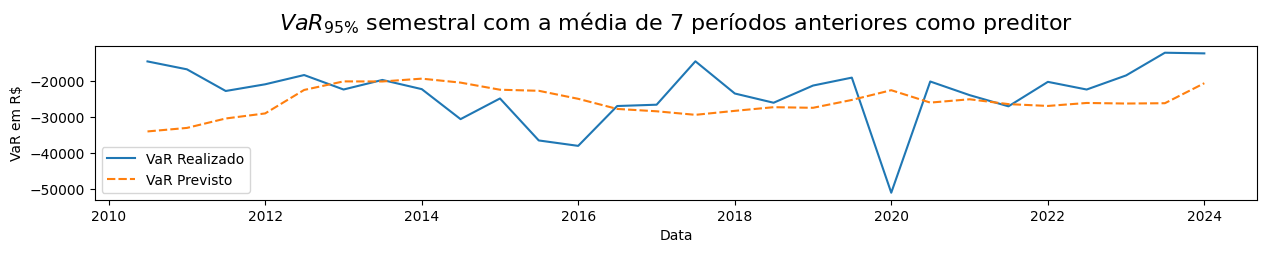

Proporção de cenários otimistas com a média de 8 períodos anteriores como preditor do VaR: 66.67%
O modelo utilizando o VaR médio de 8 períodos anteriores como preditor possui um erro de R$ 9.509,10


Proporção de cenários otimistas com a média de 9 períodos anteriores como preditor do VaR: 69.23%
O modelo utilizando o VaR médio de 9 períodos anteriores como preditor possui um erro de R$ 9.090,89


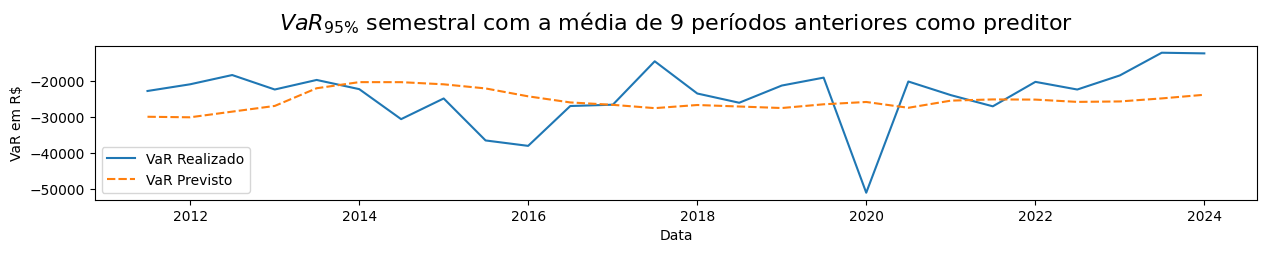

Proporção de cenários otimistas com a média de 10 períodos anteriores como preditor do VaR: 64.00%
O modelo utilizando o VaR médio de 10 períodos anteriores como preditor possui um erro de R$ 9.299,91


O modelo com 9 períodos possui o menor erro (R$ 9.090,89) com proporção de cenários otimistas de 69.23%


In [45]:
# Calculando a média móvel com janela de vários períodos anteriores para VaR
menor_erro = np.inf
for window in range(2, 11):
    df_media_movel = df[['VaR Realizado']].copy()

    df_media_movel['VaR Previsto'] = df_media_movel['VaR Realizado'].rolling(window=window).mean().shift(1)
    df_media_movel.dropna(inplace=True)

    # Identifica acertos de em modelo utilizando a média como estimador
    acertos_media_movel = df_media_movel['VaR Previsto'] <= df_media_movel['VaR Realizado']
    print(f'Proporção de cenários otimistas com a média de {window} períodos anteriores como preditor do VaR: {acertos_media_movel.mean():.2%}')



    # Calcular o erro como a diferença entre o VaR médio e o VaR realizado
    Erro_VaR_Medio = df_media_movel['VaR Previsto'] - df_media_movel['VaR Realizado']

    erro = np.sqrt( (Erro_VaR_Medio ** 2).mean() )
    print(f'O modelo utilizando o VaR médio de {window} períodos anteriores como preditor possui um erro de R$ {valor(erro)}')

    if erro < menor_erro:
        menor_erro = erro
        periodo = window
        acertos_media = acertos_media_movel

    # Visualizando os modelos no tempo
    plt.figure(figsize=(15, 2))
    sns.lineplot(df_media_movel)
    plt.legend()
    plt.title(r'$VaR_{95\%}$ semestral' + f' com a média de {window} períodos anteriores como preditor', y=1.05, fontsize=16)

    plt.ylabel('VaR em R$')
    plt.xlabel('Data')

    plt.show()

print(f'O modelo com {periodo} períodos possui o menor erro (R$ {valor(menor_erro)}) com proporção de cenários otimistas de {acertos_media.mean():.2%}')


In [46]:
# Dias de perda utilizando o VaR médio como preditor

# Calculando a média móvel com janela de 9 períodos para VaR Realizado
df_media_movel = df[['VaR Realizado', 'Qtd Dias']].copy()
df_media_movel['VaR Previsto'] = df_media_movel['VaR Realizado'].rolling(window=9).mean().shift(1)
df_media_movel.dropna(inplace=True)

dados_dict = []

# Itera sobre os dados de retornos ponderados
for periodo, dados_periodo in retorno_ponderado[9:]: # Remove os 9 primeiros, pois estes são usado como previsão para o próximo período

    df_periodo = df_media_movel.loc[periodo].copy()

    # Calcula os 5% dos dias do período
    dias_perda_previsto = round(df_periodo['Qtd Dias'] * 0.05)


    VaR_historico = df_periodo['VaR Previsto']


    retornos_diarios = dados_periodo['Retorno ponderado'] * valor_investido
    
    # Contando os dias com retornos menores que o VaR previsto
    dias_perda_realizado = (retornos_diarios < VaR_historico).sum()

    # Cria um dicionário para representar os dados deste período
    dados_perda = {'Período': periodo,
                 'Dias de perda previsto': dias_perda_previsto,
                 'Dias de perda realizado': dias_perda_realizado
                 }

    # Adiciona o dicionário de dados à lista de linhas de VaR
    dados_dict.append(dados_perda)


# Converte a lista de dicionários de VaR em um DataFrame
df_perdas_VaR_Medio = pd.DataFrame(dados_dict)

    # Define 'Período' como o índice do DataFrame
df_perdas_VaR_Medio.set_index('Período', inplace=True)

In [47]:
# Dias de perda utilizando o VaR anterior como preditor
dados_dict = []

# Itera sobre os dados de retornos ponderados
for periodo, dados_periodo in retorno_ponderado[1:]: # Remove o primeiro, pois este é usado como previsão para o próximo período

    df_periodo = df_VaR_Anterior.loc[periodo].copy()

    # Calcula os 5% dos dias do periodo
    dias_perda_previsto = round(df_periodo['Qtd Dias'] * 0.05)


    VaR_historico = df_periodo['VaR Previsto']


    retornos_diarios = dados_periodo['Retorno ponderado'] * valor_investido
    
    # Contando os dias com retornos menores que o VaR previsto
    dias_perda_realizado = (retornos_diarios < VaR_historico).sum()

    # Cria um dicionário para representar os dados deste periodo
    dados_perda = {'Período': periodo,
                 'Dias de perda previsto': dias_perda_previsto,
                 'Dias de perda realizado': dias_perda_realizado
                 }

    # Adiciona o dicionário de dados à lista de linhas de VaR
    dados_dict.append(dados_perda)


# Converte a lista de dicionários de VaR em um DataFrame
df_perdas_VaR_Anterior = pd.DataFrame(dados_dict)

    # Define 'Período' como o índice do DataFrame
df_perdas_VaR_Anterior.set_index('Período', inplace=True)

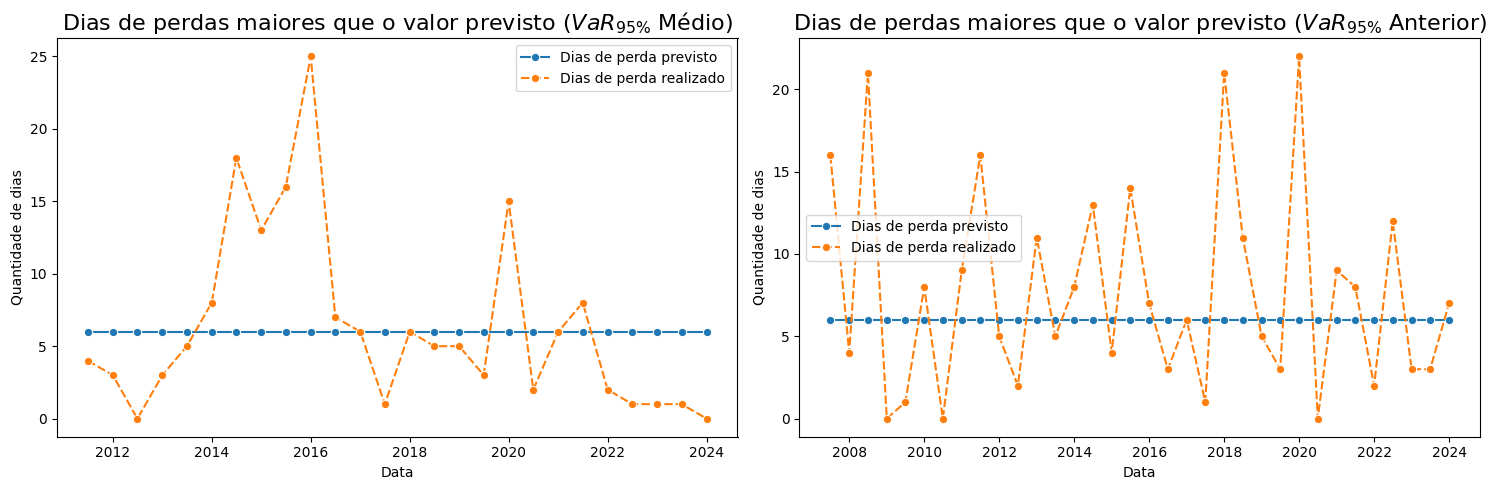

In [48]:
# Visualizando os dias de perda
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Plotagem do primeiro gráfico de linha
sns.lineplot(df_perdas_VaR_Medio, marker='o', ax=axs[0])
axs[0].set_title(r'Dias de perdas maiores que o valor previsto ($VaR_{95\%}$ Médio)', fontsize=16)
axs[0].set_ylabel('Quantidade de dias')
axs[0].set_xlabel('Data')

# Plotagem do segundo gráfico de linha
sns.lineplot(df_perdas_VaR_Anterior, marker='o', ax=axs[1])
axs[1].set_title(r'Dias de perdas maiores que o valor previsto ($VaR_{95\%}$ Anterior)', fontsize=16)
axs[1].set_ylabel('Quantidade de dias')
axs[1].set_xlabel('Data')

# Ajustando layout e mostrando os gráficos
plt.tight_layout()
plt.show()

In [49]:
# Identificando acertos de quatidade de dias estimados pelo VaR Médio
acertos_dias_VaR_Medio = df_perdas_VaR_Medio['Dias de perda previsto'] >= df_perdas_VaR_Medio['Dias de perda realizado']

print(f'Taxa de acertos dos dias de perda utilizando VaR Médio como preditor: {acertos_dias_VaR_Medio.mean():.2%}')

# Identificando acertos de quatidade de dias estimados pelo VaR Anterior
acertos_dias_VaR_Anterior = df_perdas_VaR_Anterior['Dias de perda previsto'] >= df_perdas_VaR_Anterior['Dias de perda realizado']

print(f'Taxa de acertos dos dias de perda utilizando VaR Anterior como preditor: {acertos_dias_VaR_Anterior.mean():.2%}')

Taxa de acertos dos dias de perda utilizando VaR Médio como preditor: 69.23%
Taxa de acertos dos dias de perda utilizando VaR Anterior como preditor: 50.00%


In [50]:
# Dados para a tabela de contingência 2x2
success_A = acertos_dias_VaR_Medio.sum()
failure_A = (~acertos_dias_VaR_Medio).sum()
success_B = acertos_dias_VaR_Anterior.sum()
failure_B = (~acertos_dias_VaR_Anterior).sum()

# Construindo a tabela de contingência
table = np.array([[success_A, failure_A], [success_B, failure_B]])

# Executando o Teste Exato de Fisher
odds_ratio, p_value = fisher_exact(table, alternative='greater') # alternative='greater': Especifica que estamos interessados em testar se a proporção de sucessos em A é maior do que a proporção de sucessos em B.

print(f"Razão de chances (odds ratio): {odds_ratio}")
print(f"Valor p: {p_value:.4f}")

# Comparando com o nível de significância de 5%
significancia = 0.05
if p_value < significancia:
    print(f'Rejeitamos a hipótese nula:\nHá evidências de que a proporção de acertos do VaR médio de 9 periodos anteriores é maior que a proporção de acertos do VaR com apenas um periodo anterior.')
else:
    print(f'Aceitamos a hipótese nula:\nNão há evidências suficientes para afirmar que a proporção de acertos do VaR médio de 9 periodos anteriores é maior que a proporção de acertos do VaR com apenas um periodo anterior.')

Razão de chances (odds ratio): 2.25
Valor p: 0.1084
Aceitamos a hipótese nula:
Não há evidências suficientes para afirmar que a proporção de acertos do VaR médio de 9 periodos anteriores é maior que a proporção de acertos do VaR com apenas um periodo anterior.


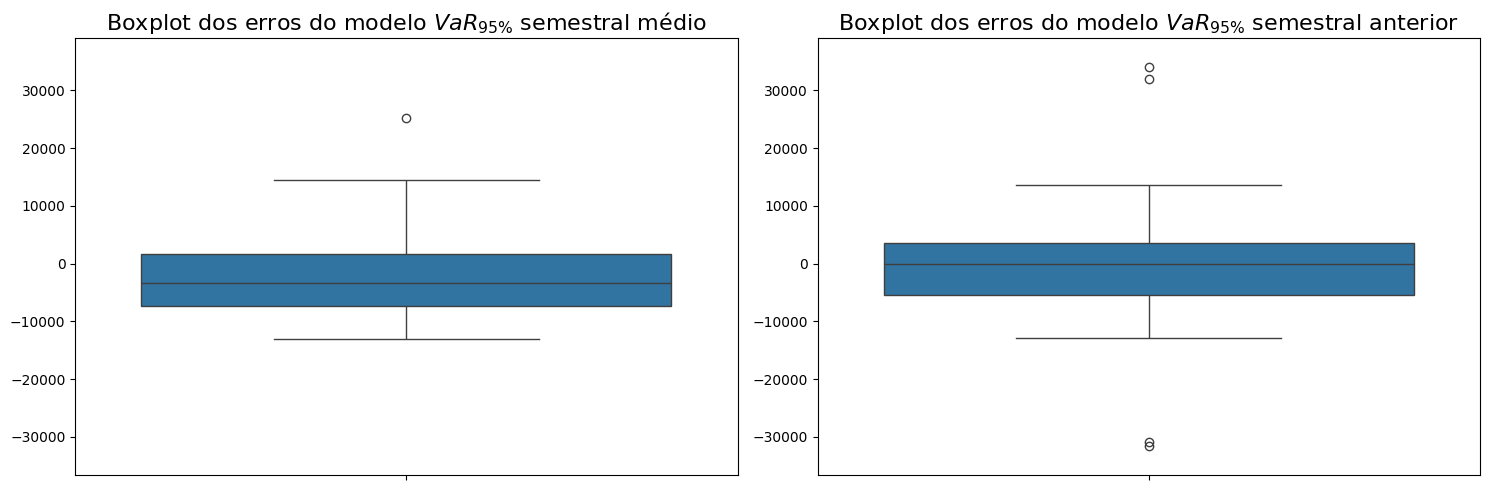

In [51]:
# Calcular o erro como a diferença entre o VaR Previsto e o VaR realizado
Erro_VaR_Medio = df_media_movel['VaR Previsto'] - df_media_movel['VaR Realizado']

# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Plotagem do primeiro gráfico
sns.boxplot(Erro_VaR_Medio, ax=axs[0])

axs[0].set_title(r'Boxplot dos erros do modelo $VaR_{95\%}$ semestral médio', fontsize=16)

# Plotagem do segundo gráfico
sns.boxplot(Erro_VaR_Anterior, ax=axs[1])

axs[1].set_title(r'Boxplot dos erros do modelo $VaR_{95\%}$ semestral anterior', fontsize=16)


# Definindo o mesmo eixo y para ambos os subplots
y_min = min(min(Erro_VaR_Medio), min(Erro_VaR_Anterior)) - 5000
y_max = max(max(Erro_VaR_Medio), max(Erro_VaR_Anterior)) + 5000
for ax in axs:
    ax.set_ylim(y_min, y_max)


# Ajustando layout e mostrando os gráficos
plt.tight_layout()
plt.show()

In [52]:
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Plotagem do primeiro histograma
sns.histplot(Erro_VaR_Medio, kde=True, ax=axs[0])
axs[0].set_title(r'Distribuição dos Erros do modelo $VaR_{95\%}$ semestral médio', fontsize=16)
axs[0].set_xlabel('Erro do modelo em R$')
axs[0].set_ylabel('Frequência')

# Adicionando as frequências no topo das barras
for patch in axs[0].patches:
    height = patch.get_height()
    axs[0].annotate(f'{height:.0f}', 
                    xy=(patch.get_x() + patch.get_width() / 2, height), 
                    xytext=(0, 5), 
                    textcoords='offset points', 
                    ha='center', 
                    va='bottom')

# Plotagem do segundo histograma
sns.histplot(Erro_VaR_Anterior, kde=True, ax=axs[1])
axs[1].set_title(r'Distribuição dos Erros do modelo $VaR_{95\%}$ semestral anterior', fontsize=16)
axs[1].set_xlabel('Erro do modelo em R$')
axs[1].set_ylabel('Frequência')

# Adicionando as frequências no topo das barras
for patch in axs[1].patches:
    height = patch.get_height()
    axs[1].annotate(f'{height:.0f}', 
                    xy=(patch.get_x() + patch.get_width() / 2, height), 
                    xytext=(0, 5), 
                    textcoords='offset points', 
                    ha='center', 
                    va='bottom')
    
# Definindo o mesmo eixo x para ambos os subplots
x_min = min(min(Erro_VaR_Medio), min(Erro_VaR_Anterior)) - 5000
x_max = max(max(Erro_VaR_Medio), max(Erro_VaR_Anterior)) + 5000
for ax in axs:
    ax.set_xlim(x_min, x_max)

# Ajustando layout e mostrando os gráficos
plt.tight_layout()
plt.show()